## <span style="color:#ff5f27;"> 🔍 Feature Importance Visualization </span>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import joblib

# Load the DataFrame
with open('ratebeer.pkl', 'rb') as file:
    df = pickle.load(file)

## <span style="color:#ff5f27;"> Data Preparation and Preprocessing </span>

In [6]:
# Calculate aggregated features
agg_df = df.groupby('beer_beerid').agg({
    'review_aroma': 'mean',
    'review_palate': 'mean',
    'review_taste': 'mean',
    'review_appearance': 'mean',
    'beer_brewerid': 'first',
    'beer_abv': 'first',
    'review_overall': ['mean', 'size']
}).reset_index()

# Rename the columns
agg_df.columns = ['beer_beerid', 'avg_aroma', 'avg_palate', 'avg_taste', 'avg_appearance', 
                  'beer_brewerid', 'beer_abv', 'avg_overall', 'review_count']

# Filter the dataframe to include only the relevant features
features = ['beer_brewerid', 'beer_abv', 'avg_appearance', 'avg_aroma', 'avg_palate', 
            'avg_taste', 'avg_overall', 'review_count']
X = agg_df[features]
y = agg_df['avg_overall']

## <span style="color:#ff5f27;"> 🌟 Feature Importance </span>

In [7]:
# Load the trained model from the pickle file
model = joblib.load('xgboost.pkl')

<Figure size 1000x800 with 0 Axes>

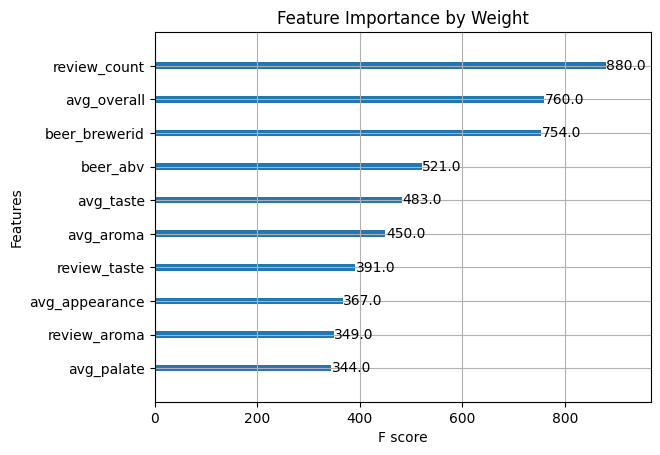

<Figure size 1000x800 with 0 Axes>

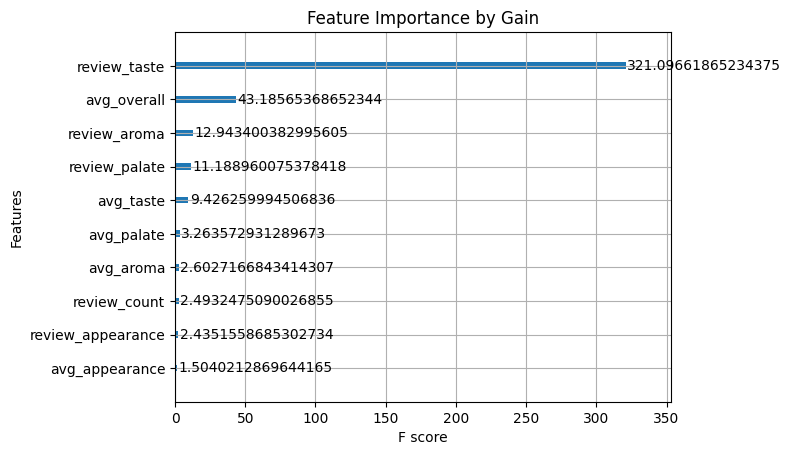

<Figure size 1000x800 with 0 Axes>

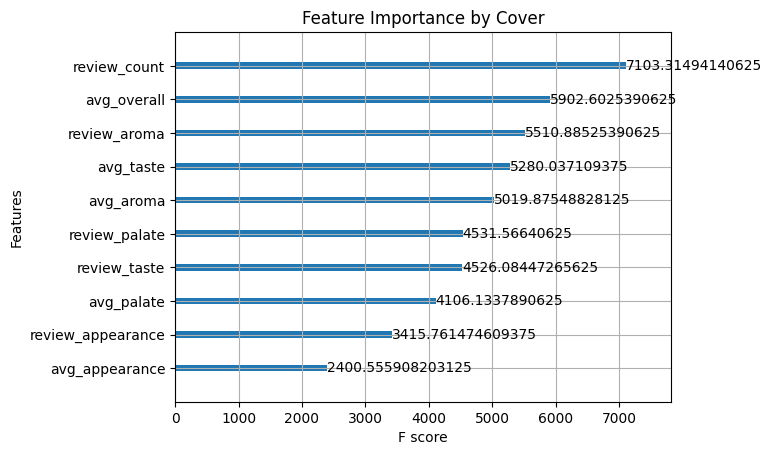

In [8]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10, importance_type='weight')
plt.title('Feature Importance by Weight')
plt.show()

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10, importance_type='gain')
plt.title('Feature Importance by Gain')
plt.show()

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10, importance_type='cover')
plt.title('Feature Importance by Cover')
plt.show()

## <span style="color:#ff5f27;"> Notes </span>

In the context of the QbD framework, the analysis above focuses on identifying and understanding Critical Quality Attributes (CQAs) that influence the overall rating of beers. Based on our model's feature importance analysis, we observe the following:

Review Count and Brewer ID: 
While these features show high importance, they primarily reflect the quantity of data available rather than the inherent qualities of the beer. Therefore, they won't be considered CQAs.

Identified CQAs:

* Overall Average Rating (avg_overall): This feature has a strong correlation with consumer satisfaction and is critical for product perception.

* Alcohol Content (beer_abv): A key attribute influencing consumer preference and product strength.

* Taste (avg_taste) and Aroma (avg_aroma): Essential sensory attributes that significantly impact consumer acceptance.

* Appearance (avg_appearance) and Palate (review_palate): Visual appeal and mouthfeel are important for overall satisfaction.


By focusing on these CQAs, breweries can leverage predictive insights from our model to enhance and maintain beer quality, ensuring they meet consumer expectations and preferences. This approach aligns with the QbD principles, emphasizing the importance of understanding and controlling critical attributes to ensure consistent product quality.